# SC51 Visualización del análisis descriptivo
---
**Reto: Autotransporte Federal de Turismo**

*Juan Carlos Medina*

# ⚙ Configuración

Importamos las librerias a utilizar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Conectamos con gdrive para obtener los datos

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#2 Crear dataframes del archivo reto.csv
dfreto = pd.read_csv ("/content/gdrive/MyDrive/Colab Notebooks/Data12/reto.csv")
dfreto

,Meses,Autobuses,Personal,Pasajeros,Kilómetros
0,Enero,660,368,4156,12.042894
1,Febrero,733,423,4152,12.134195
2,Marzo,756,405,4140,13.358546
3,Abril,674,354,4173,11.744912
4,Mayo,744,395,4180,13.405438
5,Junio,757,382,4191,12.858895
6,Julio,726,363,4277,13.041197
7,Agosto,711,353,4329,13.780331
8,Septiembre,773,403,4315,13.804009
9,Octubre,788,401,4350,15.432687


In [4]:
#2 Crear dataframes del archivo reto_3.csv
dfreto3 = pd.read_csv ("/content/gdrive/MyDrive/Colab Notebooks/Data12/reto_3.csv")
dfreto3

,Entidad,Clase,Automovil,Autobus,Camioneta
0,Aguscalientes,1,10,446,11
1,Baja California,2,15,314,20
2,Campeche,3,13,150,214
3,Cohahuila,4,5,200,9
4,Colima,5,8,367,2
5,Chiapas,6,200,280,24
6,Chihuahua,7,35,207,109
7,Distrito Federal,8,2,240,18
8,Durango,9,556,165,50
9,Guanajuato,10,300,178,118


# 📊 Gráficas  

3. Genera una gráfica para hallar la mediana de los autobuses que tienen las entidades.

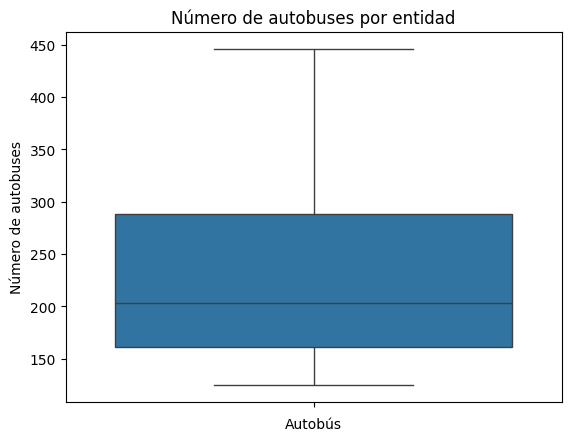

In [ ]:
#sns.boxplot(data=dfreto3, x='Entidad', y='Autobus')
sns.boxplot(dfreto3['Autobus'])
plt.title('Número de autobuses de las entidades')
plt.xlabel('Autobús')
plt.ylabel('Número de autobuses')
plt.show()

4. Gráfica en 3 dimensiones donde relacionarás las variables Automóvil, Autobús, y camioneta.

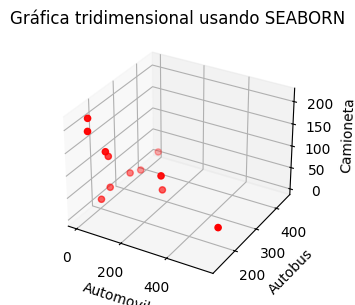

In [5]:
# Graficar
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(dfreto3['Automovil'], dfreto3['Autobus'], dfreto3['Camioneta'], c='red' , marker='o')
ax.set_xlabel('Automovil')
ax.set_ylabel('Autobus')
ax.set_zlabel('Camioneta')
ax.set_title('Gráfica tridimensional usando SEABORN')
plt.tight_layout()
plt.show()

5. Gráfica residual de las 3 variables, automóvil (variable dependiente) junto con autobús y camioneta. Las dos últimas son las variables independientes.

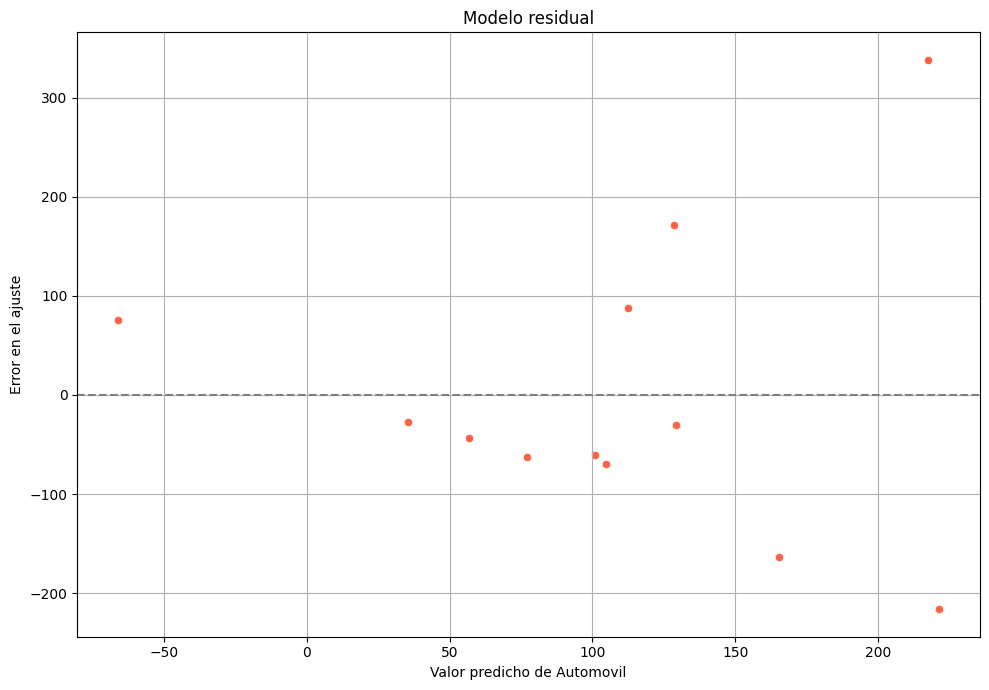

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Modelo de regresión lineal
varIndep= dfreto3[['Camioneta','Autobus']]
y = dfreto3['Automovil']


# Modelo de regresión lineal
X = varIndep.values.reshape(-1,2)
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
residuos = y - y_pred

# Gráfica residual
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_pred, y=residuos, color="tomato") # Plotting residuals against predicted values
plt.axhline(0, linestyle='--', color='gray')
plt.title('Modelo residual')
plt.xlabel('Valor predicho de Automovil')
plt.ylabel('Error en el ajuste')
plt.grid(True)
plt.tight_layout()
plt.show()

6.	Indica si existe alguna relación de ajuste entre la variable automóvil y autobuses

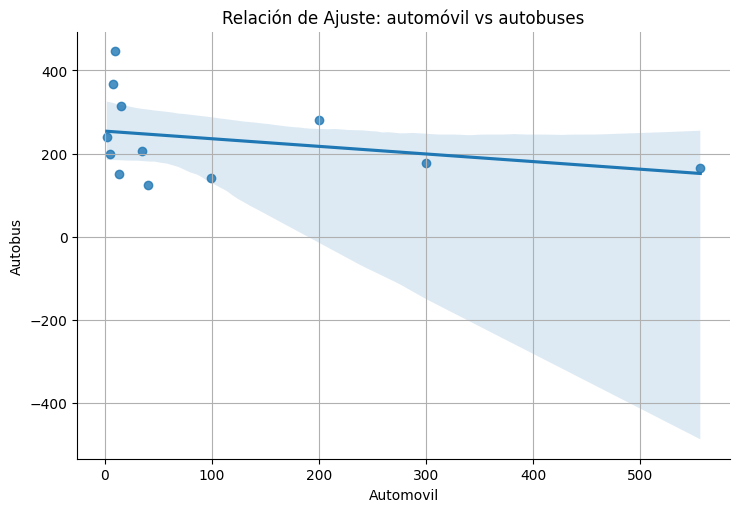

In [ ]:
sns.lmplot(data=dfreto3, x='Automovil', y='Autobus', ci=95, height=5, aspect=1.5)
plt.title('Relación de Ajuste: automóvil vs autobuses')
plt.xlabel('Automovil')
plt.ylabel('Autobus')
plt.grid(True)
plt.show()

7. Gráfica de kdeplot que muestre la relación entre los automóviles y el número de autobuses de las primeras 6 entidades.

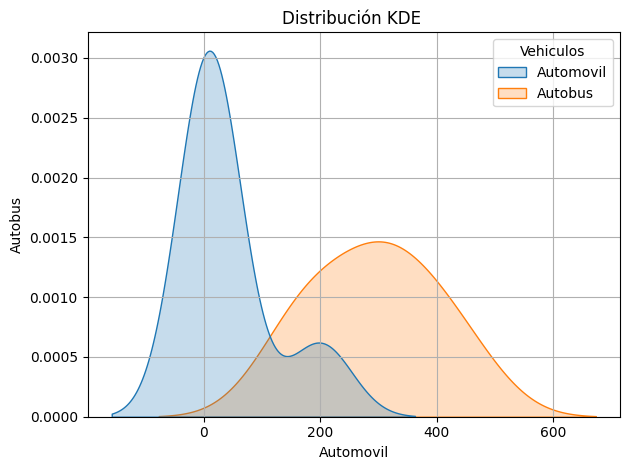

In [24]:
dfr6 = dfreto3.head(6)
dfDatos = pd.DataFrame({
  'Vehiculos': np.repeat(['Automovil', 'Autobus'], 6),
  'Numero': pd.concat([dfr6['Automovil'], dfr6['Autobus']])
})


# Crear KDEPlot
sns.kdeplot(data=dfDatos, x='Numero', hue='Vehiculos', fill=True)

plt.title('Distribución KDE ')
plt.xlabel('Automovil')
plt.ylabel('Autobus')
plt.grid(True)
plt.tight_layout()
plt.show()

8. Histograma que relacione el personal con el número de meses. Únicamente de enero a junio.

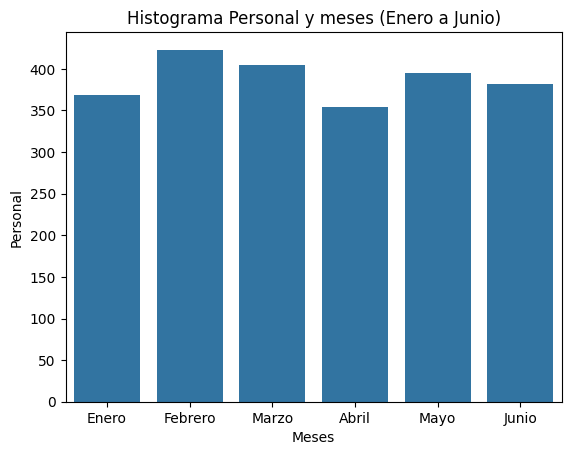

In [25]:
dfrM6 = dfreto.head(6)[['Meses','Personal ']]
dfrM6.rename(columns={'Personal ': 'Personal'} ,inplace=True)


sns.barplot(data=dfrM6, x="Meses", y="Personal")
plt.title('Histograma Personal y meses (Enero a Junio)')
plt.xlabel('Meses')
plt.ylabel('Personal')
plt.show()

9. Gráfica de pastel que relacione los automóviles con las primeras 6 entidades de la tabla.

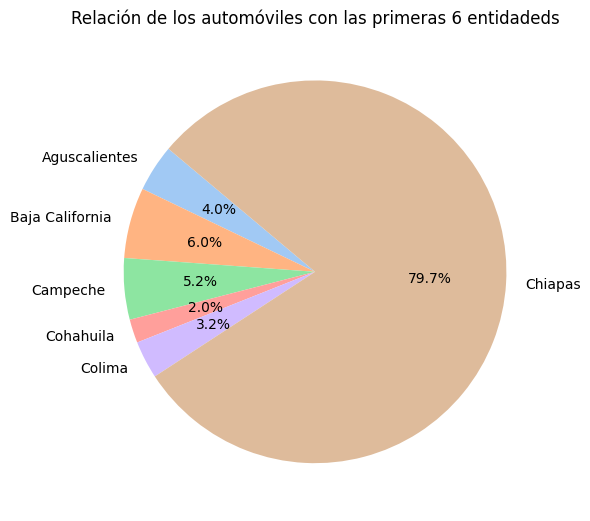

In [26]:

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(dfr6['Automovil'], labels=dfr6['Entidad'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Relación de los automóviles con las primeras 6 entidadeds')
plt.tight_layout()
plt.show()

10. Gráfica de dispersión para la relación entre automóvil vs autobús e indica qué tipo de relación tienen los datos independientes

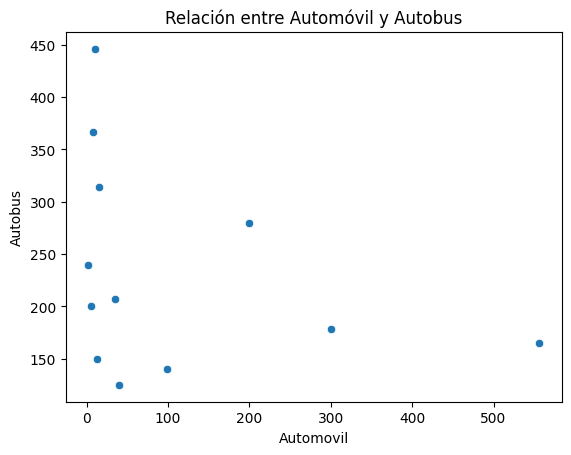

In [27]:
# Crear scatter plot
sns.scatterplot(data=dfreto3, x='Automovil', y='Autobus')
plt.title('Relación entre Automóvil y Autobus')
plt.xlabel('Automovil')
plt.ylabel('Autobus')
plt.show()


In [39]:
x = dfreto3['Automovil']
y = dfreto3['Autobus']
x_mean = np.mean(x)
y_mean = np.mean(y)
numerador = np.sum((x - x_mean) * (y - y_mean))
denominador = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
r = numerador / denominador

print(f'Coeficiente de correlación de Pearson:  {r:2f}')

Coeficiente de correlación de Pearson:  -0.312590


**Interpretación:**
Tipo de correlación entre el automóvil y el autobus negativa, cuando aumenta el número de automoviles disminuye el de autobuses, aunque la correlación tambien es débil, ya que el coeficiente de correlación es de -0.31.